# Import Dependencies

In [1]:
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json

# Use API to get .json

In [2]:
endpoint = 'breweries'
page = 1
url = f"https://sandbox-api.brewerydb.com/v2/{endpoint}/?key={api_key}&p={page}&withLocations=Y&withSocialAccounts=Y"
brewery_data = requests.get(url).json()
#print(json.dumps(brewery_data, indent=4, sort_keys=True))

# Create DataFrame

- Initially, we pull just a few interesting columns for the dataframe, most importantly, the established dates and lat/lon coordinates for each brewery
- We will add distance columns later after doing some math
- Change the Established Date column to numeric in order to use in the scatter plot

In [3]:
brewery_dict = []

for result in range(0,19):
    try:         
        brewery_info = {
            'Brewery Name': brewery_data['data'][result]['name'],
            'Brewery ID': brewery_data['data'][result]['id'], 
            'Established Date': brewery_data['data'][result]['established'],           
            'Is in business?': brewery_data['data'][result]['isInBusiness'], 
            'Website': brewery_data['data'][result]['website'],
            'Country': brewery_data['data'][result]['locations'][0]['country']['isoCode'],
            'City':brewery_data['data'][result]['locations'][0]['locality'],
            'Latitude':brewery_data['data'][result]['locations'][0]['latitude'],
            'Longitude':brewery_data['data'][result]['locations'][0]['longitude'],
            'Primary Location':brewery_data['data'][result]['locations'][0]['isPrimary'],
            'Distance from Chicago (km)':'',
            'Distance from Pottsville (km)':''
                       }      
    except:
        print('id not found')
    brewery_dict.append(brewery_info)

id not found
id not found


In [4]:
brewery_df = pd.DataFrame(brewery_dict)
brewery_df['Established Date']=pd.to_numeric(brewery_df['Established Date'])
#brewery_df

# Determine Distances from Chicago

- use geopy to determine distances via lat/long data
- Chicago is one of the hot-spots for early American breweries, made possible by the German immigrant community
- Pottsville (Becky's hometown) is home to the oldest brewery in America - Yeungling!
- update the dataframe, clean it and export as a csv

In [5]:
#!pip install geopy

In [6]:
import geopy.distance

Chi_coords = (41.8781, -87.6298)
Pottsville_coords = (40.6856, -76.1955)

for x in range(0,19):
    Brewery_coords = (brewery_df['Latitude'][x], brewery_df['Longitude'][x])
    brewery_df['Distance from Chicago (km)'][x] = geopy.distance.distance(Chi_coords, Brewery_coords).km
    brewery_df['Distance from Pottsville (km)'][x] = geopy.distance.distance(Pottsville_coords, Brewery_coords).km

C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sponr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
brewery_df = brewery_df.drop_duplicates(subset=['Brewery ID'], keep='first')

brewery_df

,Brewery ID,Brewery Name,City,Country,Distance from Chicago (km),Distance from Pottsville (km),Established Date,Is in business?,Latitude,Longitude,Primary Location,Website
0,BznahA,Anheuser-Busch InBev,Saint Louis,US,425.153,1223.63,1852,Y,38.598504,-90.209343,Y,http://www.anheuser-busch.com/
2,IImUD9,Breckenridge Brewery,Denver,US,1482.63,2443.76,1990,Y,39.723668,-105.000602,Y,http://www.breckbrew.com/
3,uM2jeT,Brouwerij De Leite,Ruddervoorde,BE,6596.86,5965,2008,Y,51.104930,3.221300,Y,http://www.deleite.be/
4,p3YrOa,Dock Street Brewery,West Philly,US,1065.96,116.384,1985,Y,39.947796,-75.222931,Y,http://www.dockstreetbeer.com
5,HaPdSL,Guinness,Dublin City,IE,5904.55,5270.41,1759,Y,53.343090,-6.290799,Y,http://www.guinness.com/
7,p1tFbP,Jackalope Brewing Company,Nashville,US,640.109,1051.46,2011,Y,36.150375,-86.779494,Y,http://www.jackalopebrew.com/
8,nLsoQ9,Lagunitas Brewing Company,Petaluma,US,2993.93,3960.21,1993,Y,38.272435,-122.662346,N,http://www.lagunitas.com/
9,941OaA,Last Name Brewing,Upland,US,2761.24,3710.58,2003,Y,34.109185,-117.690934,Y,http://www.lastnamebrewing.com/
10,yX6twV,Laughing Dog Brewing,Ponderay,US,2369.37,3277.94,2005,Y,48.298049,-116.546132,Y,http://www.laughingdogbrewing.com/
11,hGFVYy,Miller Brewing Company,Milwaukee,US,132.339,1010.47,1885,Y,43.043783,-87.962092,Y,http://www.millercoors.com/


In [8]:
brewery_df.to_csv("brewery_data.csv", encoding="utf-8", index=False)

# Figures

- I expect a greater number of older breweries closer to Chicago, given that some of the first instances of brewing in America occured here.
- With such few breweries available for free (boo sandbox), the scatter plot looks a little sparse. However, the general trend gives us preliminary data that shows that there may be a coorlation! If I wanted to do more with this, this would be good enough to convince me to splurge the $20 for full access

- plot for Pottsville is just for fun

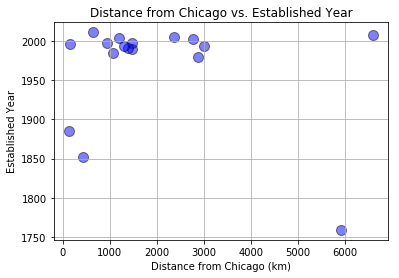

In [9]:
#Chicago
plt.scatter(brewery_df['Distance from Chicago (km)'], brewery_df['Established Date'], alpha=0.5, edgecolor ='black', color="blue",s=100)

#Chart elements
plt.title(f"Distance from Chicago vs. Established Year")
plt.xlabel('Distance from Chicago (km)')
plt.ylabel('Established Year')
plt.grid(True)

#Save and print
plt.savefig("Distance from Chicago vs. Established Year.png")
plt.show()

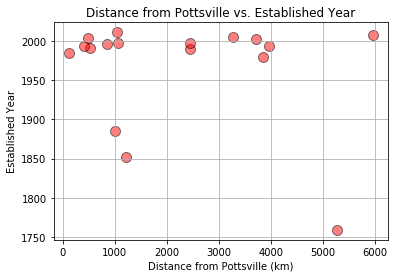

In [10]:
#Pottsville
plt.scatter(brewery_df['Distance from Pottsville (km)'], brewery_df['Established Date'], alpha=0.5, edgecolor ='black', color="red",s=100)

#Chart elements
plt.title(f"Distance from Pottsville vs. Established Year")
plt.xlabel('Distance from Pottsville (km)')
plt.ylabel('Established Year')
plt.grid(True)

#Save and print
plt.savefig("Distance from Pottsville vs. Established Year.png")
plt.show()

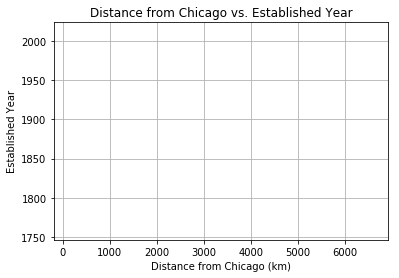

In [11]:
#Empty Plot
plt.scatter(brewery_df['Distance from Chicago (km)'], brewery_df['Established Date'], alpha=0.5, edgecolor ='none', color="none",s=100)

#Chart elements
plt.title(f"Distance from Chicago vs. Established Year")
plt.xlabel('Distance from Chicago (km)')
plt.ylabel('Established Year')
plt.grid(True)

#Save and print
plt.savefig("Empty plot.png")
plt.show()